In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Sets up the standard sizes for the images
img_height=200
img_width=200
batch_size=3

#This creates training and validation data from the data set
ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/Project_Design/Data_Set/Training',
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size, 
    image_size=(img_height,img_width), 
    shuffle=True,
    seed=123,
    validation_split=0.3,
    subset='training'
)

ds_validation=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/Project_Design/Data_Set/Training',
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size, 
    image_size=(img_height,img_width), 
    shuffle=True,
    seed=123,
    validation_split=0.3,
    subset='validation'
)

ds_test=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Capstone/Project_Design/Data_Set/Testing',
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size, 
    image_size=(img_height,img_width), 
    shuffle=True,
    seed=123,
)

Found 400 files belonging to 2 classes.
Using 280 files for training.
Found 400 files belonging to 2 classes.
Using 120 files for validation.
Found 60 files belonging to 2 classes.


In [ ]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(3, 200, 200, 1)
(3,)


In [ ]:
#Create the CNN model
model = keras.Sequential([
                          layers.InputLayer((200, 200, 1)),
                          layers.Conv2D(16, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(pool_size=(2,2)),
                          layers.Conv2D(32, 3, padding='same', activation='relu'),
                          layers.MaxPool2D(pool_size=(2,2)),
                          layers.Conv2D(64,3, activation='relu'),
                          layers.MaxPool2D(),
                          layers.Conv2D(128,3, activation='relu'),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(2),

])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam', #keras.optimizers.Adam(learning_rate=3e-4),
    metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       7

In [ ]:
history = model.fit(ds_train,
          validation_data=ds_validation, 
          epochs=5)

Epoch 1/5
94/94 [==============================] - 63s 666ms/step - loss: 8.0707 - accuracy: 0.7464 - val_loss: 0.4535 - val_accuracy: 0.8000
Epoch 2/5
94/94 [==============================] - 14s 146ms/step - loss: 0.5233 - accuracy: 0.7929 - val_loss: 0.5209 - val_accuracy: 0.7333
Epoch 3/5
94/94 [==============================] - 14s 145ms/step - loss: 0.3350 - accuracy: 0.8393 - val_loss: 0.4984 - val_accuracy: 0.7917
Epoch 4/5
94/94 [==============================] - 14s 145ms/step - loss: 0.3222 - accuracy: 0.8536 - val_loss: 0.4609 - val_accuracy: 0.7917
Epoch 5/5
94/94 [==============================] - 14s 145ms/step - loss: 0.5045 - accuracy: 0.8643 - val_loss: 0.6149 - val_accuracy: 0.7667


In [ ]:
model.evaluate(ds_test)

20/20 [==============================] - 9s 275ms/step - loss: 0.9215 - accuracy: 0.6333


[0.9215124845504761, 0.6333333253860474]

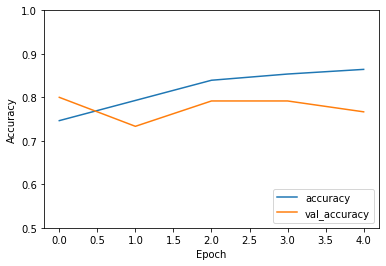

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

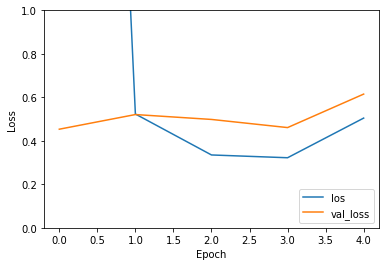

In [ ]:
plt.plot(history.history['loss'], label='los')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')